## Predicting Income Per Capita

### A Multilinear Regression Model

*by Charles Pryor & Akshay Indusekar*

We started by importing all of the necessary packages that we knew we would need.  I keep these in a separate file and import all of them at the same time whenever there is a project.

In [7]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
import itertools
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
%matplotlib inline

We found our data set on Kaggle.  This reflects the variables in which we want to produce a model that will predict income by state and several variables in which we ultimately decided upon as we perform metrics which tell us which is relevant.  We imported our data into pandas DataFrame.  From here on out, I will use the present tense.

In [8]:
df = pd.read_csv('acs2017_census_tract_data.csv')
df

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5


We start to analyze our data set.  Here we wish to see if our set includes all of the states.  The original data set has 74,001 rows and 37 columns.  It is here that we can also see the spread of the columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
TractId             74001 non-null int64
State               74001 non-null object
County              74001 non-null object
TotalPop            74001 non-null int64
Men                 74001 non-null int64
Women               74001 non-null int64
Hispanic            73305 non-null float64
White               73305 non-null float64
Black               73305 non-null float64
Native              73305 non-null float64
Asian               73305 non-null float64
Pacific             73305 non-null float64
VotingAgeCitizen    74001 non-null int64
Income              72885 non-null float64
IncomeErr           72885 non-null float64
IncomePerCap        73256 non-null float64
IncomePerCapErr     73256 non-null float64
Poverty             73159 non-null float64
ChildPoverty        72891 non-null float64
Professional        73190 non-null float64
Service             73190 non-null float64


It is imperative that we see a true representation of all states in the Union since we are predicting salary by each state.

In [10]:
df.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

We now check for null values in our data set.

In [11]:
df.isnull().sum()

TractId                0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64

We see that we have many columns with null values.  Being that we have a data set with over 74,000 rows, we decided to drop all of the rows containing null values.

In [12]:
x_cols = df.columns.tolist()

In [13]:
del x_cols[0]
x_cols

['State',
 'County',
 'TotalPop',
 'Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific',
 'VotingAgeCitizen',
 'Income',
 'IncomeErr',
 'IncomePerCap',
 'IncomePerCapErr',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment']

In [14]:
df = df[df['Income'].notna()]
df = df[df['ChildPoverty'].notna()]
df = df[df['MeanCommute'].notna()]

In [15]:
df.isnull().sum()

TractId             0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [16]:
df1.duplicated().sum()

NameError: name 'df1' is not defined

In [111]:
df1 = df[[
       'Poverty',
       'ChildPoverty', 'Professional', 'Service','Construction', 'Office', 
       'Production']]
df1

,Poverty,ChildPoverty,Professional,Service,Construction,Office,Production
0,10.7,20.8,38.5,15.6,10.8,22.8,12.4
1,22.4,35.8,30.5,24.9,6.3,22.9,15.4
2,14.7,21.1,27.9,19.4,9.9,33.3,9.6
3,2.3,1.7,29.0,16.6,9.1,25.8,19.5
4,12.2,17.9,48.8,13.8,3.5,20.5,13.4
...,...,...,...,...,...,...,...
73996,39.4,61.8,42.2,25.3,7.7,18.0,6.9
73997,35.5,39.9,34.4,13.4,12.3,23.1,16.8
73998,52.8,77.2,29.3,23.6,4.6,32.9,9.6
73999,50.1,58.0,29.8,20.6,13.9,28.8,6.9


In [ ]:
df1['Office']

(array([1.1500e+02, 3.2830e+03, 2.4399e+04, 3.3918e+04, 9.6960e+03,
        1.1790e+03, 1.0600e+02, 1.7000e+01, 4.0000e+00, 1.0000e+00]),
 array([ 0.  ,  7.23, 14.46, 21.69, 28.92, 36.15, 43.38, 50.61, 57.84,
        65.07, 72.3 ]),
 <a list of 10 Patch objects>)

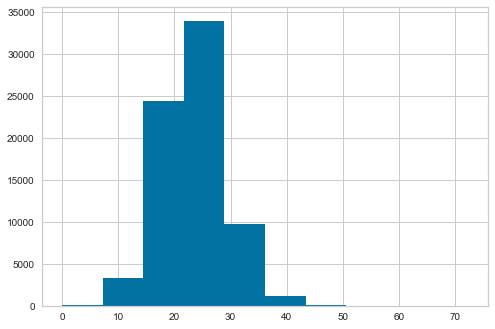

In [112]:
plt.hist(df1['Office'])

In [18]:
df1.isnull().sum()

Poverty         0
ChildPoverty    0
Professional    0
Service         0
Construction    0
Office          0
Production      0
dtype: int64

In [19]:
df2 = df.groupby(["State"]).sum().head(85)
df2.sort_values(by = 'IncomePerCap').sum()

TractId             2.063222e+15
TotalPop            3.231214e+08
Men                 1.588425e+08
Women               1.642789e+08
Hispanic            1.256782e+06
White               4.460314e+06
Black               9.638347e+05
Native              5.292240e+04
Asian               3.455893e+05
Pacific             1.062280e+04
VotingAgeCitizen    2.284190e+08
Income              4.444524e+09
IncomeErr           7.046611e+08
IncomePerCap        2.230018e+09
IncomePerCapErr     3.090316e+08
Poverty             1.166886e+06
ChildPoverty        1.537875e+06
Professional        2.585402e+06
Service             1.370585e+06
Office              1.702559e+06
Construction        6.735900e+05
Production          9.396847e+05
Drive               5.517902e+06
Carpool             6.780631e+05
Transit             3.905382e+05
Walk                2.127567e+05
OtherTransp         1.371517e+05
WorkAtHome          3.354224e+05
MeanCommute         1.896510e+06
Employed            1.513486e+08
PrivateWor

In [20]:

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)


In [21]:
df1['IncomePerCap'].value_counts()

KeyError: 'IncomePerCap'

In [22]:
corr

NameError: name 'corr' is not defined

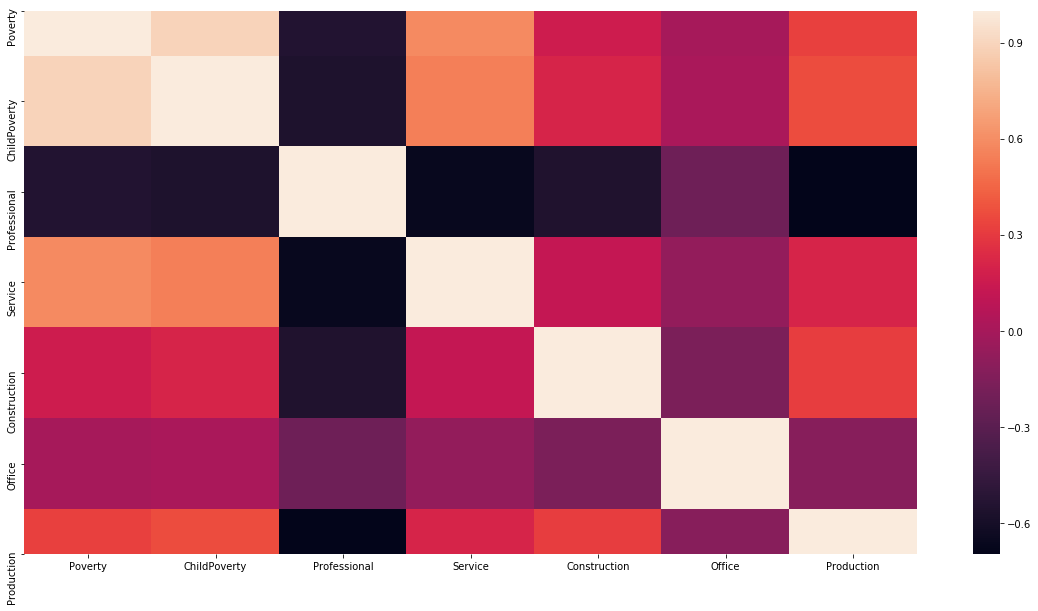

In [23]:
# plot the heatmap
corr = df1.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

In [24]:
sns.boxplot(df1.IncomePerCap)

AttributeError: 'DataFrame' object has no attribute 'IncomePerCap'

In [25]:
y = df['IncomePerCap']
scaler = StandardScaler()
np.array(df1).reshape(-1,1)

array([[10.7],
       [20.8],
       [38.5],
       ...,
       [17.8],
       [19.1],
       [26.9]])

In [26]:
scaler.fit(df1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
transformed_data = scaler.transform(df1)

In [28]:
transformed_data
ridge_reg = Ridge()

In [29]:
ridge_reg.fit(transformed_data, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
print(ridge_reg.coef_)


[-4722.85358571  1249.04266201  6420.74614245 -2406.6226845
 -1760.18713865 -1504.92484516 -2363.17321526]


In [31]:
ridge_reg.predict(scaler.transform(np.array([8, 17, 40, 10,25,20,5])))

ValueError: Expected 2D array, got 1D array instead:
array=[ 8. 17. 40. 10. 25. 20.  5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [32]:
df1 = df[[ 'Poverty',
       'ChildPoverty', 'Professional', 'Service','Construction', 'Office', 
       'Production']]
df1

,Poverty,ChildPoverty,Professional,Service,Construction,Office,Production
0,10.7,20.8,38.5,15.6,10.8,22.8,12.4
1,22.4,35.8,30.5,24.9,6.3,22.9,15.4
2,14.7,21.1,27.9,19.4,9.9,33.3,9.6
3,2.3,1.7,29.0,16.6,9.1,25.8,19.5
4,12.2,17.9,48.8,13.8,3.5,20.5,13.4
...,...,...,...,...,...,...,...
73996,39.4,61.8,42.2,25.3,7.7,18.0,6.9
73997,35.5,39.9,34.4,13.4,12.3,23.1,16.8
73998,52.8,77.2,29.3,23.6,4.6,32.9,9.6
73999,50.1,58.0,29.8,20.6,13.9,28.8,6.9


In [101]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X**2, y, test_size=0.2, random_state = 45)

In [96]:
ss = StandardScaler()
scaledxtrain = ss.fit_transform(X_train)
scaledxtest = ss.transform(X_test)

In [97]:
#X = df[refined_cols]
X2 = sm.add_constant(scaledxtest)
model = sm.OLS(y_test, X2, hasconst= True)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           IncomePerCap   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     6824.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:09:11   Log-Likelihood:            -1.5157e+05
No. Observations:               14544   AIC:                         3.032e+05
Df Residuals:                   14537   BIC:                         3.032e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.061e+04     67.401    454.099      0.000    3.05e+04    3.07e+04
x1         -3928.3391     83.052    -47.300      0.000   -4091.131   -3765.547
x2          1.433e+04    135.263    105.977      0.000    1.41e+04    1.46e+04
x3          1636.2594    107.513     15.219      0.000    1425.520    1846.998
x4          1259.2553     92.429     13.624      0.000    1078.083    1440.428
x5          2108.2970     92.625     22.762      0.000    1926.740    2289.854
x6          1409.3372     99.556     14.156      0.000    1214.194    1604.480
==============================================================================
Omnibus:                     9352.427   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           422174.134
Skew:                           2.484   Prob(JB):                         0.00
Kurtosis:                      28.923   Cond. No.                         4.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(scaledxtrain, y_train)
y_predict = lr.predict(scaledxtest)
r_squared = r2_score(y_test, y_predict)
print(r_squared)

0.7378801824030221


In [46]:
x_cols = df1.columns.tolist()


In [47]:
x_cols

['Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Construction',
 'Office',
 'Production']

In [35]:
del x_cols[0]

In [48]:

for col in x_cols:
    ## This is called standard scaling
    ## Here we don't have to do this but still it is a good practice
    df1[col] = (df1[col] - df1[col].mean())/df1[col].std()
df1.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Poverty,ChildPoverty,Professional,Service,Construction,Office,Production
0,-0.430194,-0.018763,0.195906,-0.407542,0.258579,-0.109663,-0.068793
1,0.511180,0.788874,-0.336052,0.759391,-0.498506,-0.091778,0.326333
2,-0.108357,-0.002610,-0.508938,0.069270,0.107162,1.768236,-0.437578
3,-1.106052,-1.047153,-0.435794,-0.282065,-0.027431,0.426880,0.866339
4,-0.309505,-0.174906,0.880801,-0.633400,-0.969581,-0.521012,0.062916


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72718 entries, 0 to 74000
Data columns (total 7 columns):
Poverty         72718 non-null float64
ChildPoverty    72718 non-null float64
Professional    72718 non-null float64
Service         72718 non-null float64
Construction    72718 non-null float64
Office          72718 non-null float64
Production      72718 non-null float64
dtypes: float64(7)
memory usage: 4.4 MB


In [38]:
!pip install yellowbrick

Note about office

In [68]:
refined_cols = ['Poverty',
        'Professional', 'Service','Construction', 'Office', 
       'Production']
X = df[refined_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(refined_cols, vif))

[('Poverty', 4.374656628571393),
 ('Professional', 4.728411696864023),
 ('Service', 8.422823531174561),
 ('Construction', 3.572582554041673),
 ('Office', 11.118577758022248),
 ('Production', 4.577552759536368)]

In [69]:
import statsmodels.api as sm

X = df[refined_cols]
X = sm.add_constant(X.values)
model = sm.OLS(y, X, hasconst= True)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           IncomePerCap   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                 2.720e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:42:22   Log-Likelihood:            -7.6361e+05
No. Observations:               72718   AIC:                         1.527e+06
Df Residuals:                   72711   BIC:                         1.527e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.762e+04   5.06e+04      0.546      0.585   -7.15e+04    1.27e+05
x1          -296.1415      3.362    -88.094      0.000    -302.730    -289.553
x2           535.2673    505.705      1.058      0.290    -455.913    1526.448
x3          -187.3412    505.743     -0.370      0.711   -1178.596     803.914
x4          -178.5480    505.734     -0.353      0.724   -1169.784     812.688
x5          -153.6169    505.728     -0.304      0.761   -1144.842     837.608
x6          -189.9628    505.745     -0.376      0.707   -1181.221     801.295
==============================================================================
Omnibus:                    54480.698   Durbin-Watson:                   1.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2359490.473
Skew:                           3.183   Prob(JB):                         0.00
Kurtosis:                      30.170   Cond. No.                     8.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
X = df[refined_cols]
y = df['IncomePerCap']
lm = LinearRegression()
## instantiate the selector object
selector = RFE(lm, n_features_to_select=6 )

## fit the model
selector.fit(X,y)
## check which columns are selected
ind = selector.get_support()
print(ind)
X.loc[:,ind].head()

[ True  True  True  True  True  True]


,Poverty,Professional,Service,Construction,Office,Production
0,10.7,38.5,15.6,10.8,22.8,12.4
1,22.4,30.5,24.9,6.3,22.9,15.4
2,14.7,27.9,19.4,9.9,33.3,9.6
3,2.3,29.0,16.6,9.1,25.8,19.5
4,12.2,48.8,13.8,3.5,20.5,13.4


In [71]:
## let's compare the R2 scores with these predictors
lm6 = selector.estimator_
R2 = lm6.score(X.loc[:, ind],y)
print(R2)

0.691762753603654


In [72]:
R2_adj = 1- (1-R2)*(len(y)-1)/(len(y) - 3 - 1)
print(R2_adj)

0.6917500364963681


In [73]:
print(y.values.reshape(-1,1).shape)
print(y_predict.reshape(-1,1).shape)

(72718, 1)
(72718, 1)


In [89]:
Xlog = np.log(X.values)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [90]:
Xlog

array([[2.37024374, 3.65065824, 2.74727091, 2.37954613, 3.12676054,
        2.51769647],
       [3.10906096, 3.41772668, 3.2148678 , 1.84054963, 3.13113691,
        2.73436751],
       [2.68784749, 3.32862669, 2.96527307, 2.29253476, 3.5055574 ,
        2.2617631 ],
       ...,
       [3.96651119, 3.37758752, 3.16124671, 1.5260563 , 3.49347266,
        2.2617631 ],
       [3.91402101, 3.39450839, 3.02529108, 2.63188884, 3.36037539,
        1.93152141],
       [4.23988687, 2.51769647, 3.16968558, 2.87919846, 2.94968834,
        3.29212629]])

In [60]:
y_predict.shape

(72718,)

In [59]:
y_predict = lm6.predict(X)


In [65]:
residuals = y - y_predict
residuals

0        -1336.503538
1        -6087.453206
2        -4627.819540
3        -1995.656257
4        -4322.515201
             ...     
73996   -19711.178830
73997   -12969.006615
73998    -5948.122605
73999    -8331.594022
74000     8222.588314
Name: IncomePerCap, Length: 72718, dtype: float64

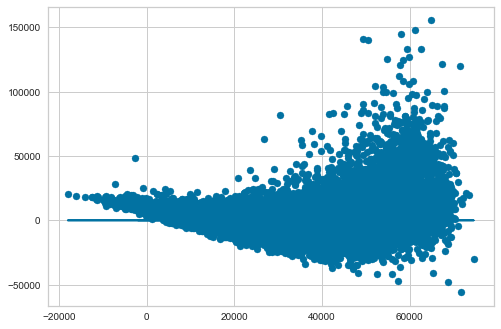

In [74]:
plt.scatter(y_predict, residuals)
plt.plot(y_predict, [0 for i in range(len(df))])
plt.show()

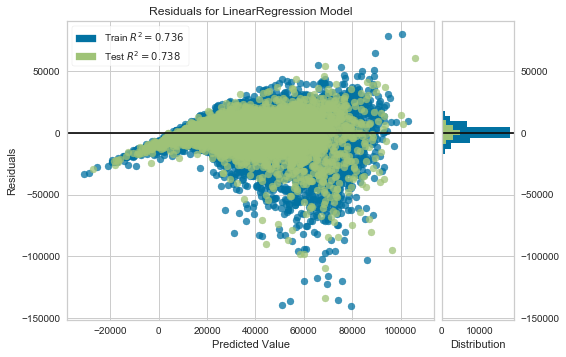

In [102]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets



visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()